# Diabetes Prediction with Machine Learning

## I. Problem Statement
Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. If left untreated, diabetes can cause many complications. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

## II. Dataset and Data Preparation

Several constraints were placed on the selection of these instances from a larger database. In particular, 
all patients here are females at least 21 years old.

#### Columns:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: function which scores likelihood of diabetes based on family history
* Age: Age (years)
* Outcome:(0 or 1) 0: negative, 1: positive


## Import Libraries

In [104]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


* There are 2000 rows and 9 columns in this dataset
* No empty values exist in any of the columns

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


#### Let's have a general sense of the distributions in this dataset
#### To check for further low variability or extreme skewness

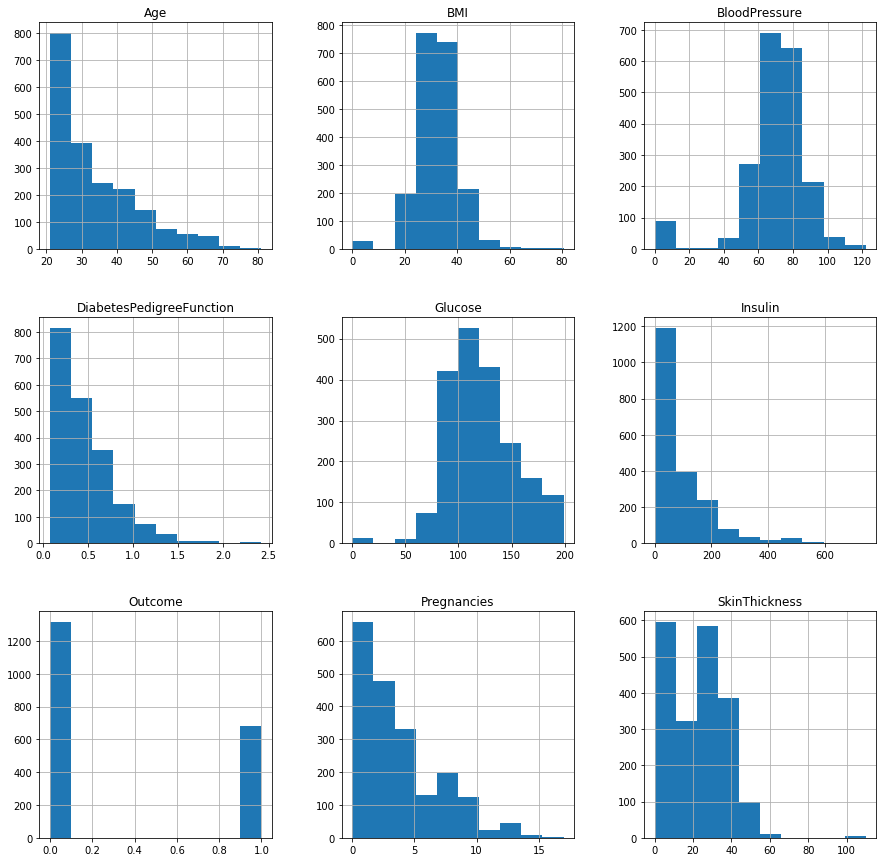

In [5]:
df.hist(figsize = (15,15))
plt.show()

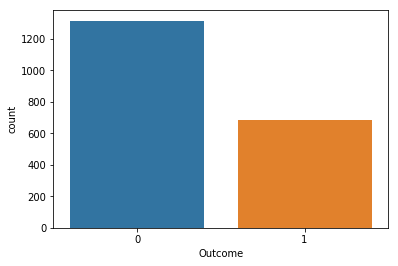

In [6]:
sns.countplot('Outcome',data=df)
plt.show()

2/3 of the dataset tested negative for diabetes

### Correlation Matrix

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


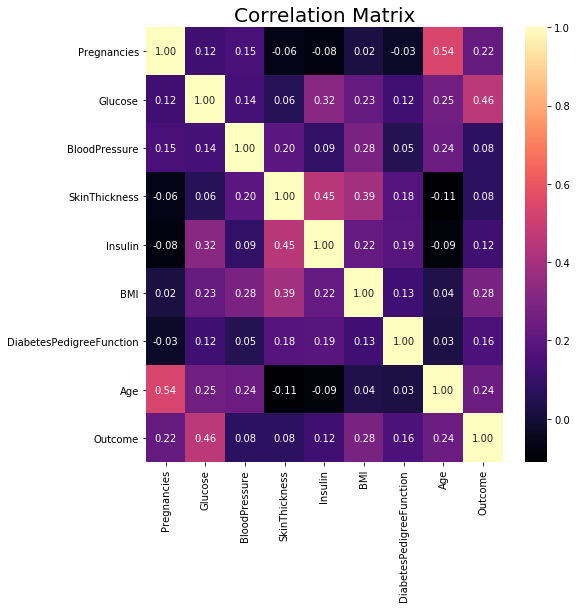

In [8]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax1, cmap = "magma" )
ax1.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [9]:
df.isnull().sum()
print ("No null values")

No null values


### Outlier Detection

In [10]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")### Outlier Detection
        
   

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


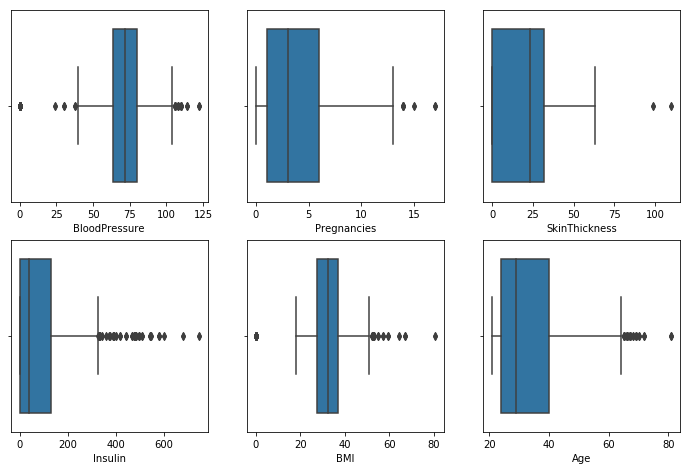

In [11]:
#visualise outliers
figure = plt.figure(figsize=(12, 12))
ax1 = plt.subplot(3,3,1)
sns.boxplot(x = df["BloodPressure"], ax=ax1)

ax2 = plt.subplot(3,3,2)
sns.boxplot(x = df["Pregnancies"], ax=ax2)

ax3 = plt.subplot(3,3,3)
sns.boxplot(x = df["SkinThickness"], ax=ax3)

ax4 = plt.subplot(3,3,4)
sns.boxplot(x = df["Insulin"], ax=ax4)

ax5= plt.subplot(3,3,5)
sns.boxplot(x = df["BMI"], ax=ax5)

ax6= plt.subplot(3,3,6)
sns.boxplot(x = df["Age"], ax=ax6)

In [12]:
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.7*IQR
upper = Q3 + 1.7*IQR    
    # Get those outside the bounds
outside_upper = df['Pregnancies'] > upper
outside_lower = df['Pregnancies'] < lower
outliers_df = df[outside_upper | outside_lower]
print("number of outliers")
print(len(outliers_df))

number of outliers
5


In [13]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.8*IQR
upper = Q3 + 1.8*IQR    
    # Get those outside the bounds
outside_upper = df['BloodPressure'] > upper
outside_lower = df['BloodPressure'] < lower
outliers_df = df[outside_upper | outside_lower]
print("number of outliers")
print(len(outliers_df))

number of outliers
108


# Feature Engineering
Creating new variables is important for models. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [16]:
# BMI Range
def bmi(x):
    if x < 18.5:
        return "underweight"
    elif 18.5 <= x <= 24.9:
        return "normal"
    elif 25 <= x <= 29.9:
        return 'overweight'
    elif x > 29.9:
        return 'obese'

df['BMIScore'] = df['BMI'].apply(bmi)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIScore
0,2,138,62,35,0,33.6,0.127,47,1,obese
1,0,84,82,31,125,38.2,0.233,23,0,obese
2,0,145,0,0,0,44.2,0.630,31,1,obese
3,0,135,68,42,250,42.3,0.365,24,1,obese
4,1,139,62,41,480,40.7,0.536,21,0,obese


In [17]:
# insulin score
def insulin(x):
    if x >= 16 and x <= 166:
        return "Normal"
    else:
        return "Abnormal"
    
df['InsulinScore'] = df['Insulin'].apply(insulin)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIScore,InsulinScore
0,2,138,62,35,0,33.6,0.127,47,1,obese,Abnormal
1,0,84,82,31,125,38.2,0.233,23,0,obese,Normal
2,0,145,0,0,0,44.2,0.630,31,1,obese,Abnormal
3,0,135,68,42,250,42.3,0.365,24,1,obese,Abnormal
4,1,139,62,41,480,40.7,0.536,21,0,obese,Abnormal


In [18]:
# Glucose Score
def glucose(x):
    if x <= 70:
        return 'low'
    elif 70 < x <= 99:
        return 'normal'
    elif 99 < x <= 126:
        return 'overweight'
    elif x > 126:
        return 'high'
    
df['GlucoseScore'] = df['Glucose'].apply(glucose)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIScore,InsulinScore,GlucoseScore
0,2,138,62,35,0,33.6,0.127,47,1,obese,Abnormal,high
1,0,84,82,31,125,38.2,0.233,23,0,obese,Normal,normal
2,0,145,0,0,0,44.2,0.630,31,1,obese,Abnormal,high
3,0,135,68,42,250,42.3,0.365,24,1,obese,Abnormal,high
4,1,139,62,41,480,40.7,0.536,21,0,obese,Abnormal,high


# Label Encoding
As some machine learning models only can work on numerical data, we would need to convert some of the categorical data.

In [19]:
# BMI SCORE
# 0 - underweight, 1 - normal, 2 - overweight, 3 - obese

def BMIEncode(x):
    if x == 'underweight':
        return 0
    elif x == 'normal':
        return 1
    elif x == 'overweight':
        return 2
    elif x == 'obese':
        return 3

df['bmi int'] = df['BMIScore'].apply(BMIEncode)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIScore,InsulinScore,GlucoseScore,bmi int
0,2,138,62,35,0,33.6,0.127,47,1,obese,Abnormal,high,3
1,0,84,82,31,125,38.2,0.233,23,0,obese,Normal,normal,3
2,0,145,0,0,0,44.2,0.630,31,1,obese,Abnormal,high,3
3,0,135,68,42,250,42.3,0.365,24,1,obese,Abnormal,high,3
4,1,139,62,41,480,40.7,0.536,21,0,obese,Abnormal,high,3


In [20]:
# Insulin SCORE
# 0 - Normal, 1 - Abnormal

def InsulinEncode(x):
    if x == 'Normal':
        return 0
    elif x == 'Abnormal':
        return 1

df['insulin int'] = df['InsulinScore'].apply(InsulinEncode)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIScore,InsulinScore,GlucoseScore,bmi int,insulin int
0,2,138,62,35,0,33.6,0.127,47,1,obese,Abnormal,high,3,1
1,0,84,82,31,125,38.2,0.233,23,0,obese,Normal,normal,3,0
2,0,145,0,0,0,44.2,0.630,31,1,obese,Abnormal,high,3,1
3,0,135,68,42,250,42.3,0.365,24,1,obese,Abnormal,high,3,1
4,1,139,62,41,480,40.7,0.536,21,0,obese,Abnormal,high,3,1


In [21]:
# Glucose SCORE
# 0 - low, 1 - normal, 2 - overweight, 3 - high

def GlucoseEncode(x):
    if x == 'low':
        return 0
    elif x == 'normal':
        return 1
    elif x == 'overweight':
        return 2
    elif x == 'high':
        return 3

df['glucose int'] = df['GlucoseScore'].apply(GlucoseEncode)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIScore,InsulinScore,GlucoseScore,bmi int,insulin int,glucose int
0,2,138,62,35,0,33.6,0.127,47,1,obese,Abnormal,high,3,1,3
1,0,84,82,31,125,38.2,0.233,23,0,obese,Normal,normal,3,0,1
2,0,145,0,0,0,44.2,0.630,31,1,obese,Abnormal,high,3,1,3
3,0,135,68,42,250,42.3,0.365,24,1,obese,Abnormal,high,3,1,3
4,1,139,62,41,480,40.7,0.536,21,0,obese,Abnormal,high,3,1,3


# Models
1. Logistic Regression
2. Random Forest
3. Knn
4. XGBoost
5. LightGBM

## Logistic Regression

In [22]:
# only numerical columns to fit into model
numeric_df = df.drop(columns = ['BMIScore', 'InsulinScore', 'GlucoseScore'])
numeric_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi int,insulin int,glucose int
0,2,138,62,35,0,33.6,0.127,47,1,3,1,3
1,0,84,82,31,125,38.2,0.233,23,0,3,0,1
2,0,145,0,0,0,44.2,0.630,31,1,3,1,3
3,0,135,68,42,250,42.3,0.365,24,1,3,1,3
4,1,139,62,41,480,40.7,0.536,21,0,3,1,3


In [23]:
# Selecting features

col_list = []
for col in numeric_df:
    if col != 'Outcome':
        col_list.append(col)
print(col_list)

df_x = numeric_df[col_list]
df_y = numeric_df['Outcome']

df_x.head()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'bmi int', 'insulin int', 'glucose int']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,bmi int,insulin int,glucose int
0,2,138,62,35,0,33.6,0.127,47,3,1,3
1,0,84,82,31,125,38.2,0.233,23,3,0,1
2,0,145,0,0,0,44.2,0.630,31,3,1,3
3,0,135,68,42,250,42.3,0.365,24,3,1,3
4,1,139,62,41,480,40.7,0.536,21,3,1,3


In [24]:
# Train,Test, Split
x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=10)

display(x_train.head())
display(y_train.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,bmi int,insulin int,glucose int
811,1,95,74,21,73,25.9,0.673,36,2,0,1
1631,4,156,75,0,0,48.3,0.238,32,3,1,3
337,5,115,76,0,0,31.2,0.343,44,3,1,2
1467,8,197,74,0,0,25.9,1.191,39,2,1,3
1561,0,116,64,39,225,40.2,0.720,50,3,1,2


811     0
1631    1
337     1
1467    1
1561    0
Name: Outcome, dtype: int64

In [25]:
# fit model
logisticRegr = LogisticRegression()

logisticRegr = logisticRegr.fit(x_train, y_train)
results = logisticRegr.predict(x_test)

Accuracy: 0.815 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       269
           1       0.76      0.63      0.69       131

   micro avg       0.81      0.81      0.81       400
   macro avg       0.80      0.77      0.78       400
weighted avg       0.81      0.81      0.81       400



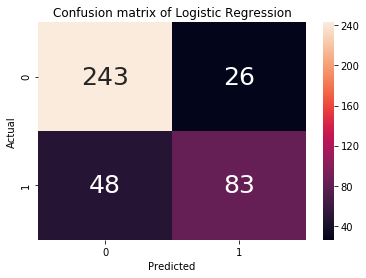

In [26]:
cm = confusion_matrix(y_test, results)
lr_acc = accuracy_score(y_test, results)
print("Accuracy:", lr_acc, "\n")
print(classification_report(y_test, results))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Logistic Regression")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()

## Random Forest

In [51]:
rand = RandomForestClassifier()
rand = rand.fit(x_train, y_train)
results2 = rand.predict(x_test)

Accuracy: 0.98 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       269
           1       0.98      0.95      0.97       131

   micro avg       0.98      0.98      0.98       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.98      0.98       400



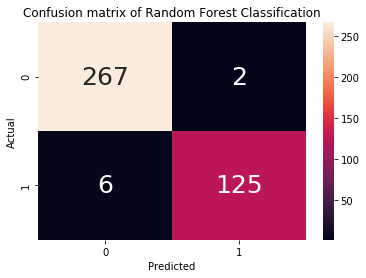

In [89]:
cm = confusion_matrix(y_test, results2)
lr_acc = accuracy_score(y_test, results2)
print("Accuracy:", lr_acc, "\n")
print(classification_report(y_test, results2))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Random Forest Classification")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

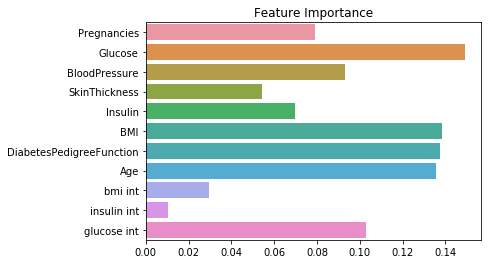

In [55]:
feature_imp = rand.feature_importances_
g = sns.barplot(x=feature_imp, y=col_list) 
g.set_title('Feature Importance')

## XGBoost

In [85]:
xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)
results3 = xgb.predict(x_test)

Accuracy: 0.8725 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       269
           1       0.81      0.80      0.80       131

   micro avg       0.87      0.87      0.87       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.87      0.87      0.87       400



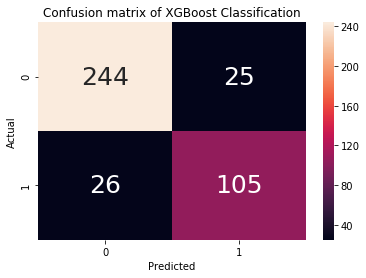

In [90]:
cm = confusion_matrix(y_test, results3)
lr_acc = accuracy_score(y_test, results3)
print("Accuracy:", lr_acc, "\n")
print(classification_report(y_test, results3))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of XGBoost Classification")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

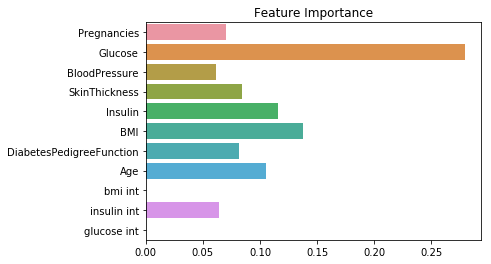

In [95]:
g = sns.barplot(x=xgb.feature_importances_, y=col_list) 
g.set_title('Feature Importance')

## LightGBM

In [99]:
lgbm = LGBMClassifier()
lgbm = lgbm.fit(x_train, y_train)
results4 = lgbm.predict(x_test)

Accuracy: 0.965 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       269
           1       0.94      0.95      0.95       131

   micro avg       0.96      0.96      0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.97       400



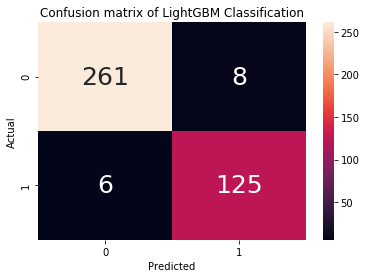

In [109]:
cm = confusion_matrix(y_test, results4)
lr_acc = accuracy_score(y_test, results4)
print("Accuracy:", lr_acc, "\n")
print(classification_report(y_test, results4))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of LightGBM Classification")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

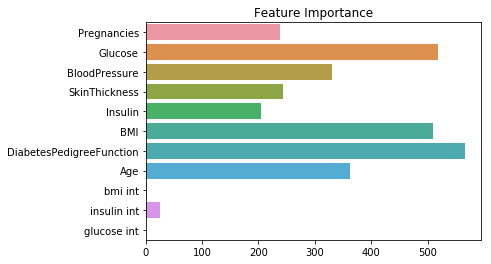

In [102]:
g = sns.barplot(x=lgbm.feature_importances_, y=col_list) 
g.set_title('Feature Importance')

## KNN

In [105]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
results5 = knn.predict(x_test)

Accuracy: 0.7975 

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       269
           1       0.69      0.70      0.69       131

   micro avg       0.80      0.80      0.80       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.80      0.80      0.80       400



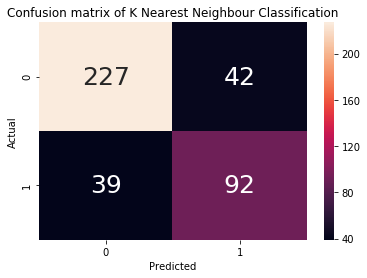

In [110]:
cm = confusion_matrix(y_test, results5)
lr_acc = accuracy_score(y_test, results5)
print("Accuracy:", lr_acc, "\n")
print(classification_report(y_test, results5))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of K Nearest Neighbour Classification")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()

# Conclusion
The random forest prediction model gave the best accuracy of 98%, followed by the lightGBM Model of 96.5%